# Hand Written Digits Classifier

Using keras convolutional neural networks to classify hand written numbers

## Setup And Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist

# Set default seed
np.random.seed(2802)

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# Split train into train and validation
X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_train_raw, y_train_raw, test_size=0.1, shuffle=True)

In [3]:
image_height = X_train_raw.shape[1]  
image_width = X_train_raw.shape[2]

color_channels = 1 # Grayscale

print(f'Image (width x height x channel): ({image_width} x {image_height} x {color_channels})')

Image (width x height x channel): (28 x 28 x 1)


In [4]:
print(f'Train data shape: {X_train_raw.shape}')
print(f'Train labels shape: {y_train_raw.shape}\n')

print(f'Test data shape: {X_test_raw.shape}')
print(f'Test labels shape: {y_test_raw.shape}\n')

print(f'Validation data shape: {X_val_raw.shape}')
print(f'Validation labels shape: {y_val_raw.shape}')

Train data shape: (54000, 28, 28)
Train labels shape: (54000,)

Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Validation data shape: (6000, 28, 28)
Validation labels shape: (6000,)


In [5]:
def show(data, view='head', n=6, figsize=(6, 5)):
    X, y = data
    
    digits = None
    labels = None

    possible_views = ['head', 'tail', 'sample']
    
    if view == 'head':
        digits = X[:n]
        labels = y[:n]
    elif view == 'tail':
        digits = X[X.shape[0] - n:]
        labels = y[y.shape[0] - n:]
    elif view == 'sample':
        sample = np.random.randint(0, X.shape[0], n)
        digits = X[sample]
        labels = y[sample]
        
    if view not in possible_views:
        raise ValueError(f'Invalid view "{view}". View should be one of: {", ".join(possible_views)}')
        
    n_rows, n_cols = (2, int(n / 2))
    _, ax = plt.subplots(n_rows, n_cols,
                           figsize=figsize,
                           squeeze=True,
                           gridspec_kw={'wspace': 0.10, 'hspace': 0.01})
    
    for row in range(n_rows):
        for col in range(n_cols):
            idx = row * n_cols + col
            ax[row, col].axis('off')
            ax[row, col].set_title(f'Nº {labels[idx]}')
            ax[row, col].imshow(digits[idx], cmap='gray')
                         
    plt.show()
    plt.close()

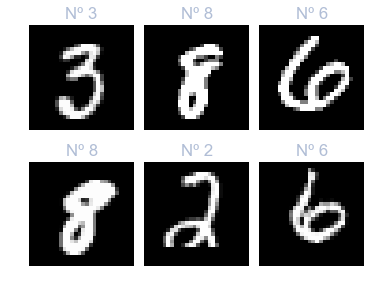

In [6]:
show(data=(X_train_raw, y_train_raw))

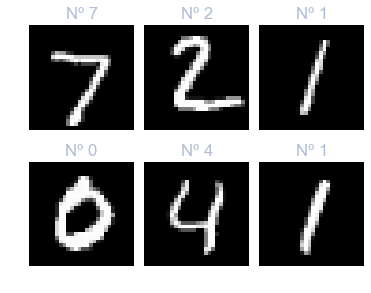

In [7]:
show(data=(X_test_raw, y_test_raw))

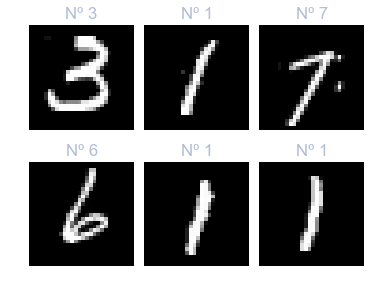

In [8]:
show(data=(X_val_raw, y_val_raw))

## Pre-Processing Data

In [9]:
X_train = np.reshape(X_train_raw, (X_train_raw.shape[0], image_height, image_width, color_channels))
X_test = np.reshape(X_test_raw, (X_test_raw.shape[0], image_height, image_width, color_channels))
X_val = np.reshape(X_val_raw, (X_val_raw.shape[0], image_height, image_width, color_channels))

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_val shape: {X_val.shape}')

X_train shape: (54000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
X_val shape: (6000, 28, 28, 1)


In [10]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [11]:
from keras.utils import to_categorical

num_classes = 10 # Number of possible outputs: 0-9

y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)
y_val = to_categorical(y_val_raw, num_classes)

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_val shape: {y_val.shape}')

y_train shape: (54000, 10)
y_test shape: (10000, 10)
y_val shape: (6000, 10)


## Model Selection

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=(image_height, image_width, color_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Neural network layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flat

In [13]:
results = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.1871 - acc: 0.9415 - val_loss: 0.0630 - val_acc: 0.9795
Epoch 2/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0484 - acc: 0.9843 - val_loss: 0.0439 - val_acc: 0.9862
Epoch 3/15
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0348 - acc: 0.9891 - val_loss: 0.0532 - val_acc: 0.9832
Epoch 4/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0367 - val_acc: 0.9887
Epoch 5/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0218 - acc: 0.9933 - val_loss: 0.0388 - val_acc: 0.9885
Epoch 6/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0179 - acc: 0.9942 - val_loss: 0.0456 - val_acc: 0.9858
Epoch 7/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.

## Checking Accuracy

In [27]:
results_df = pd.DataFrame.from_dict(results.history)
results_df.head()

,val_loss,val_acc,loss,acc
0,0.062952,0.979500,0.187119,0.941463
1,0.043891,0.986167,0.048424,0.984333
2,0.053223,0.983167,0.034758,0.989056
3,0.036673,0.988667,0.026016,0.991796
4,0.038762,0.988500,0.021784,0.993315


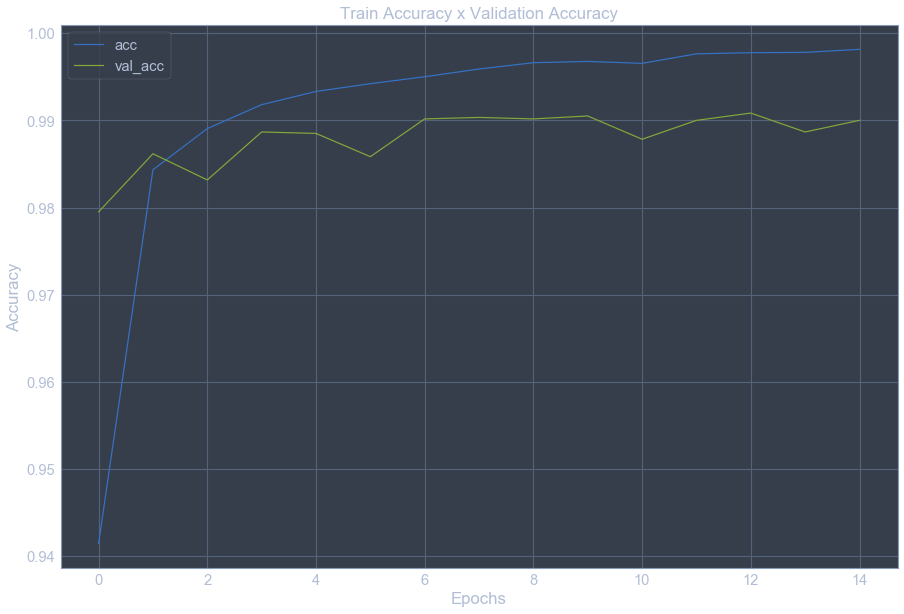

In [15]:
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=results_df[['acc', 'val_acc']], dashes=False)

ax.set_title('Train Accuracy x Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

ax

## Checking Loss

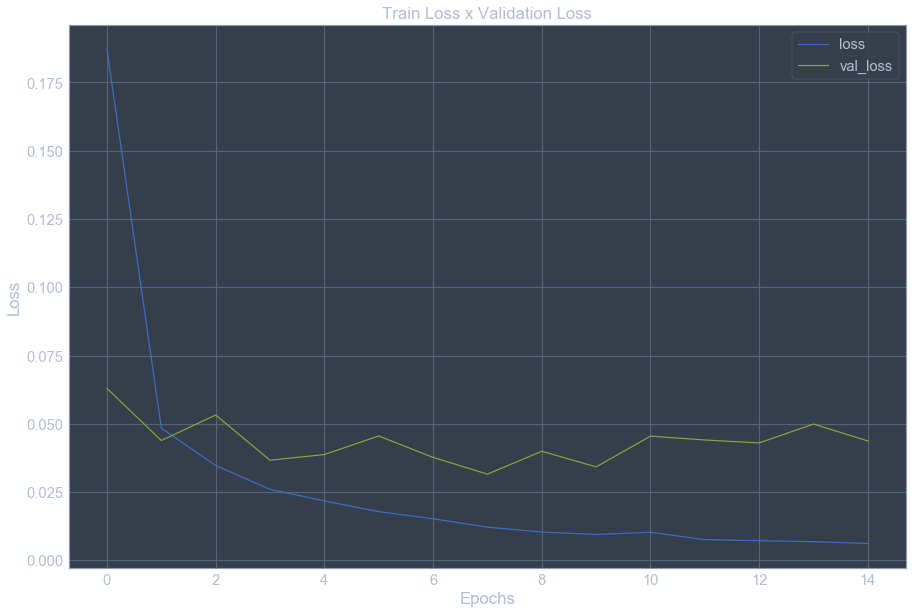

In [16]:
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=results_df[['loss', 'val_loss']], dashes=False)

ax.set_title('Train Loss x Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

ax

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

10000/10000 [==============================] - 4s 393us/step
Test loss: 0.03847818287750597
Test accuracy: 0.9905


# Predicting Hand Written Digits

In [18]:
predictions = model.predict(X_test)

In [28]:
def view_predictions(y_pred, y_true, n_predictions=None):
    y_predicted = None
    _y_true = None

    if n_predictions is None:
        n_predictions = y_true.shape[0]
        
        y_predicted = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_true, axis=1)
    else:
        y_predicted = np.argmax(y_pred, axis=1)[:n_predictions]
        y_true = np.argmax(y_true, axis=1)[:n_predictions]
    
    print('Predicted:\t', y_predicted)
    print('True:\t\t', y_true)
    print('Diff:\t\t', (y_predicted == y_true).astype(int))
    
    prediction_error_count = (y_predicted != y_true).astype(int).sum()
    print(f'Error Count:\t {prediction_error_count} x {n_predictions}')

In [29]:
view_predictions(predictions, y_test, 25)

Predicted:	 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4]
True:		 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
Diff:		 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Error Count:	 1 x 25


## Pre-Processing Any Image

In [21]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

# Credits to https://www.youtube.com/watch?v=oYndcjlzwX8
def image_to_array(filepath):
    image = Image.open(filepath).convert('L')
    new_image = Image.new('L', size=(28, 28), color=255)

    width, height = tuple(map(float, image.size))
    if width > height:
        new_height = int(20.0 / width * height)
        new_height = new_height or 1

        image_tmp = image.resize((20, new_height), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        width_top = int((28 - new_height) / 2)

        new_image.paste(image_tmp, (4, width_top))
    else:
        new_width = int(20.0 / height * width)
        new_width = new_width or 1

        image_tmp = image.resize((new_width, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        width_left = int((28 - new_width) / 2)
        
        new_image.paste(image_tmp, (width_left, 4))

    pixels = list(new_image.getdata())
    pixels = [[(255 - x) * 1.0 / 255.0 for x in pixels]]

    byte_array = [[0 for x in range(28)] for y in range(28)]

    k = 0
    for i in range(28):
        for j in range(28):
            byte_array[i][j] = pixels[0][k]
            k = k + 1

    return byte_array

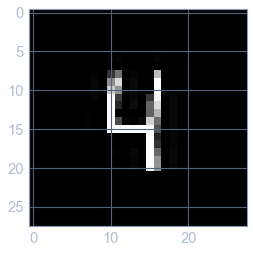

In [22]:
number_4 = image_to_array('datasets/hand_written_digits/number_4.png')

plt.imshow(number_4, cmap='gray')
plt.show()

In [30]:
my_number = np.reshape(number_4, (image_height, image_width, color_channels))

X = np.array([my_number])

y_raw = np.array([4])
y = to_categorical(y_raw, num_classes)

my_number_predictions = model.predict(X)
view_predictions(my_number_predictions, y)

Predicted:	 [4]
True:		 [4]
Diff:		 [1]
Error Count:	 0 x 1


*Notes:*

When I write a digit on my own after pre processing it the prediction the model was able to hit the number

---
*My pre-processing:*

I have used gimp to remove the background and evidence the writing in grayscale

In [25]:
import pickle

def save_model(filepath, fitted_model):
    try:
        with open(filepath, 'wb') as f:
            pickle.dump(fitted_model, f)
    except Exception as e:
        print(e)

        
def load_model(filepath):
    fitted_model = None
    try:
        with open(filepath, 'rb') as f:
            fitted_model = pickle.load(f)
            
        return fitted_model
    except Exception as e:
        print(e)

In [26]:
# Saving user based model
filename = 'conv_nn_hand_written_digits_classifier.pkl'
filepath = f'models/{filename}'

save_model(filepath, model)

[Errno 2] No such file or directory: 'models/conv_nn_hand_written_digits_classifier.pkl'
